## Deep Convolutional Classificator using Fashion MNIST dataset

![alt text](fashion-mnist_long.png)

In this project, we will make a convolutional neural network (hereafter CNN) to classify the different fashion images contained on the [Fashion MNIST dataset](https://www.kaggle.com/zalando-research/fashionmnist). This dataset consists of a set of 70000 images of 28 x 28 pixels in greyscale. Such images can be of 10 different labels, corresponding to 

| Label number | Label |
| --- | --- |
| 0 | T-shirt |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Before we proceed, we will go through a brief explanation of what is a CNN.

As it is said in this [IBM article](https://www.ibm.com/topics/convolutional-neural-networks), neural networks are a subset of machine learning, and they are at the heart of deep learning algorithms. They are comprised of node layers, containing an input layer, one or more hidden layers, and an output layer. Each node connects to another and has an associated weight and threshold, as it is shown below.

<figure>
    <img src="neural_networks-001.png" style="width:80%">
    <figcaption>Source: https://tikz.net/neural_networks/</figcaption>
</figure>

The elemental brick of each neural network is an *artificial neuron*, which is described through a model called *perceptron*, whose structure is:

<figure>
    <img src="activation_function.ppm" style="width:80%">
    <figcaption>Source: Google Images (2019)</figcaption>
</figure>

The idea of such a mechanism is to try to model the real behavior of a biological neuron. The biological neuron takes information sent from other neurons through the dendrites, it is processed by the nucleus of the neuron and it is sent away by the axon. To model this biological mechanism, computer scientists have developed the perceptron, which aims to take data from other neurons through its *weights*, process it with a *linear function*, and 'fire' that information based on the output of the *activation function*.

<figure>
    <img src="neuron.png" style="width:80%">
    <figcaption>Source: https://en.wikipedia.org/wiki/Neuron#/media/File:Blausen_0657_MultipolarNeuron.png</figcaption>
</figure>

While working with image, speech, or audio signal inputs, *convolutional neural networks* are distinguished from other neural networks by their superior performance. They have three main types of layers, which are:
- Convolutional layer
- Pooling layer
- Fully-connected (FC) layer

The *convolutional layer* is the first layer of a convolutional network. While convolutional layers can be followed by additional convolutional layers or *pooling layers*, the *fully-connected* layer is the final layer. With each layer, the CNN increases in its complexity, identifying greater portions of the image. Earlier layers focus on simple features, such as colors and edges. As the image data progresses through the layers of the CNN, it starts to recognize larger elements or shapes of the object until it finally identifies the intended object.

#### Convolutional layer

The convolutional layer is the core building block of a CNN, and it is where the majority of computation occurs. It requires a few components, which are:

- **Input data**: Since in this project we are going to work with clothes images, let’s assume that the input will be a grey color image. It is made up of a matrix of pixels, which means that the input will have two dimensions, a height and width. Since the images are in greyscale, they have just one *channel*. For RGB images, the number of channels is 3.
- **Filter**: It is the set of feature detectors, composed of various *kernels*, which will move across the *receptive fields* of the image, checking if the feature is present. This process is known as a *convolution*. The kernel is a two-dimensional (2-D) array of weights, which represents part of the image. They can vary in size, which determines the size of the receptive field. The kernel is then applied to an area of the image, and a dot product is calculated between the input pixels and the kernel. This dot product is then fed into an output array. Afterwards, the kernel shifts by a *stride*, repeating the process until the kernel has swept across the entire image. There will be one kernel per input channel of the convolutional layer and one filter per output channel.
- **Feature map**: The final output from the series of dot products from the input and the filter is known as a feature map, activation map, or a convolved feature.

After each convolution operation, a CNN applies an *activation function* transformation to the feature map, introducing nonlinearity to the model. 

As we mentioned earlier, another convolution layer can follow the initial convolution layer. When this happens, the structure of the CNN can become hierarchical as the later layers can see the pixels within the receptive fields of prior layers.

<a title="Vincent Dumoulin, Francesco Visin, MIT &lt;http://opensource.org/licenses/mit-license.php&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Convolution_arithmetic_-_Padding_strides.gif"><img width="512" alt="Convolution arithmetic - Padding strides" src="https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif"></a>

<figure>
    <img src="convolution_example.png" style="width:80%">
    <figcaption>Source: https://developer.nvidia.com/discover/convolution</figcaption>
</figure>

#### Pooling layer

Pooling layers, also known as downsampling, conducts dimensionality reduction, reducing the number of parameters in the input. Its purpose is to gradually shrink the representation’s spatial dimension. Similar to the convolutional layer, the pooling operation sweeps a filter across the entire input, but the difference is that this filter does not have any weights. Instead, the kernel applies an aggregation function to the values within the receptive field, populating the output array. There are two main types of pooling:

- **Max pooling**: As the filter moves across the input, it selects the pixel with the maximum value to send to the output array. As an aside, this approach tends to be used more often compared to average pooling.
- **Average pooling**: As the filter moves across the input, it calculates the average value within the receptive field to send to the output array.

<a title="Rafay Qayyum - Introduction To Pooling Layers In CNN" href="https://pub.towardsai.net/introduction-to-pooling-layers-in-cnn-dafe61eabe34"><img width="512" alt="Introduction To Pooling Layers In CNN" src="https://miro.medium.com/v2/resize:fit:828/1*fXxDBsJ96FKEtMOa9vNgjA.gif"></a>

While a lot of information is lost in the pooling layer, it also has a number of benefits to the CNN. They help to reduce complexity, improve efficiency, and limit risk of overfitting.

As a final comment, after each kernel is applied in each input channel, the output maps are combined to give as a result one feature map. Thus, as said above, the number of filters will determine the number of output channels in a convolutional layer.

<a title="Irhum Shafkat - Intuitively Understanding Convolutions for Deep Learning" href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1#:~:text=Each%20filter%20in%20a%20convolution,a%20processed%20version%20of%20each."><img width="1024" alt="Filter's output combination" src="https://miro.medium.com/v2/resize:fit:2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif"></a>

#### Fully-connected layer

They are the layers that do not use as inputs 2D or 3D arrays of data, performing a convolution, but take 1D arrays of data and apply to them a linear transformation. They are composed of the perceptrons defined above and their objective is to produce the final output of the entire network.

<figure>
    <img src="fully_cnn.JPG" style="width:100%">
    <figcaption>Source: https://developersbreach.com/convolution-neural-network-deep-learning/</figcaption>
</figure>

We will implement a CNN whose aim is to predict the labels of the clothes given input images. Let us start by importing the packages.

In [1]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as met

# ------------------------------- Plot features ------------------------------
# Properties to decorate the plots.
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'   
plt.rcParams['font.sans-serif'] = 'New Century Schoolbook' # 'Times', 'Liberation Serif', 'Times New Roman'
#plt.rcParams['font.serif'] = ['Helvetica']
plt.rcParams['font.size'] = 10
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['legend.markerscale'] = 7
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width']= 0.5
plt.rcParams['xtick.major.size']= 5.0
plt.rcParams['xtick.minor.width']= 0.5
plt.rcParams['xtick.minor.size']= 3.0
plt.rcParams['ytick.major.width']= 0.5
plt.rcParams['ytick.major.size']= 5.0
plt.rcParams['ytick.minor.width']= 0.5
plt.rcParams['ytick.minor.size']= 3.0
# ----------------------------------------------------------------------------

/home/scollazo/anaconda3/envs/env-torchode/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/scollazo/anaconda3/envs/env-torchode/lib/python3.7/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /home/scollazo/anaconda3/envs/env-torchode/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


As a first step, we can load the set of images, which is provided by Torch. But before, let us define a custome image dataset class.

In [2]:
# We create a custom Dataset class to work the images
class CustomImageDataset(Dataset):
    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset
        
    # We redefine the __len__() method
    def __len__(self):
        return len(self.dataset)
    
    # We redefine the __getitem__() method
    def __getitem__(self, i):
        image, label = self.dataset[i]
        # We rewrite the original label to allow it be able to be compared against the model predictions
        zer = torch.zeros(10)
        zer[label] = 1.
        label = zer
        return image, label

In [3]:
# Download training data
train_d = FashionMNIST(
    root='Dataset',
    train=True,
    download=True,
    transform=ToTensor(),
)

train_data = train_d
train_data = CustomImageDataset(train_data)

# Download test data
test_d = FashionMNIST(
    root='Dataset',
    train=False,
    download=True,
    transform=ToTensor(),
)

test_data = test_d
test_data = CustomImageDataset(test_data)

Once we have loaded the Dataset objects it is time to instantiate the Dataloader objects in order to get the proper inputs to the CNN. Also, it is possible to train the CNN in batches if the inputs are Dataloader objects.

In [4]:
# Size of the batch of images
batch_size = 1000

train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Before proceed, let us talk a little bit about **Torch tensors**.

In [5]:
# Tensor definition
t = torch.tensor([1.0, 3.5, -np.pi, 0.0, 9.0], dtype=torch.double)

In [6]:
print(len(t), "\n", t.size(), "\n", t.shape, "\n")

5 
 torch.Size([5]) 
 torch.Size([5]) 



In [7]:
print(t*t, "\n", t+t, "\n", t[-1], "\n", t.view(1, 5), "\n", t.view(5, 1))

tensor([ 1.0000, 12.2500,  9.8696,  0.0000, 81.0000], dtype=torch.float64) 
 tensor([ 2.0000,  7.0000, -6.2832,  0.0000, 18.0000], dtype=torch.float64) 
 tensor(9., dtype=torch.float64) 
 tensor([[ 1.0000,  3.5000, -3.1416,  0.0000,  9.0000]], dtype=torch.float64) 
 tensor([[ 1.0000],
        [ 3.5000],
        [-3.1416],
        [ 0.0000],
        [ 9.0000]], dtype=torch.float64)


In [8]:
print(t.reshape(1, 5), "\n", t.reshape(5, 1))

tensor([[ 1.0000,  3.5000, -3.1416,  0.0000,  9.0000]], dtype=torch.float64) 
 tensor([[ 1.0000],
        [ 3.5000],
        [-3.1416],
        [ 0.0000],
        [ 9.0000]], dtype=torch.float64)


In [9]:
# Some mathematical functions
print(torch.sin(t), "\n", torch.arctan(t), "\n", t.cosh(), "\n", t.exp())

tensor([ 8.4147e-01, -3.5078e-01, -1.2246e-16,  0.0000e+00,  4.1212e-01],
       dtype=torch.float64) 
 tensor([ 0.7854,  1.2925, -1.2626,  0.0000,  1.4601], dtype=torch.float64) 
 tensor([1.5431e+00, 1.6573e+01, 1.1592e+01, 1.0000e+00, 4.0515e+03],
       dtype=torch.float64) 
 tensor([2.7183e+00, 3.3115e+01, 4.3214e-02, 1.0000e+00, 8.1031e+03],
       dtype=torch.float64)


In [10]:
a = torch.arange(1.0, 6.0, 1.0)
print(a, "\n")
print(torch.pow(t, 2.0), "\n", t.pow(2), "\n", t.pow(a), "\n")
a = torch.linspace(1.0, 6.0, 5)
print(a, "\n")
print(torch.pow(t, 2.0), "\n", t.pow(2), "\n", t.pow(a))

tensor([1., 2., 3., 4., 5.]) 

tensor([ 1.0000, 12.2500,  9.8696,  0.0000, 81.0000], dtype=torch.float64) 
 tensor([ 1.0000, 12.2500,  9.8696,  0.0000, 81.0000], dtype=torch.float64) 
 tensor([ 1.0000e+00,  1.2250e+01, -3.1006e+01,  0.0000e+00,  5.9049e+04],
       dtype=torch.float64) 

tensor([1.0000, 2.2500, 3.5000, 4.7500, 6.0000]) 

tensor([ 1.0000, 12.2500,  9.8696,  0.0000, 81.0000], dtype=torch.float64) 
 tensor([ 1.0000, 12.2500,  9.8696,  0.0000, 81.0000], dtype=torch.float64) 
 tensor([1.0000e+00, 1.6755e+01,        nan, 0.0000e+00, 5.3144e+05],
       dtype=torch.float64)


In [11]:
print(t == t, "\n", torch.ge(t, 2.0*t), "\n", t.isnan(), "\n", t.argmax())

tensor([True, True, True, True, True]) 
 tensor([False, False,  True,  True, False]) 
 tensor([False, False, False, False, False]) 
 tensor(4)


In [12]:
# Some statistical functions
print(t.mean(), "\n", t.mode(), "\n", t.median(), "\n", t.sum())

tensor(2.0717, dtype=torch.float64) 
 torch.return_types.mode(
values=tensor(-3.1416, dtype=torch.float64),
indices=tensor(2)) 
 tensor(1., dtype=torch.float64) 
 tensor(10.3584, dtype=torch.float64)


In [13]:
print(t.numpy())

[ 1.          3.5        -3.14159265  0.          9.        ]


In [14]:
ran = torch.rand(2, 2, 3)
print(ran)

tensor([[[0.2936, 0.3901, 0.4505],
         [0.6332, 0.3688, 0.1200]],

        [[0.0886, 0.3318, 0.8490],
         [0.2068, 0.2734, 0.9899]]])


In [15]:
ran_int = torch.randint(0, 100, (2, 2, 3))
print(ran_int)

tensor([[[37, 82, 36],
         [30, 92,  4]],

        [[94, 35, 19],
         [77, 91, 60]]])


Coming back to the main work, we can check if cuda is available for training. The use of cuda optimizes the training process, allowing us to use the different GPUs we have in our computer.

In [16]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


Now we have loaded the dataset and we transformed it in appropiate Dataloader objects, it is time to define the model we will train to predict the label of the image used as input. As said before, the model is a CNN, and the architecture of such a network will be explained below. Before, we need to define the hyperparameters of the CNN, as usual in machine learning models.

In [17]:
# Model parameters
n_inputs = 196
n_hidden = 98
n_outputs = 10
in_channels = 1
out_channels = 1
kernel_size_1 = 7
kernel_size_2 = 5
p_dropout = 0.1   # Dropout probability
lr = 1e-3   # Learning rate
n_epochs = 300   # Number of epochs

In [18]:
# Model definition
class Model(nn.Module):
    # Define model elements
    def __init__(self):
        """ The super() builtin returns a proxy object (temporary object of the superclass) which
        let's you avoid referring to the base class explicitly and it allows us to access methods 
        of the base class. """
        super().__init__()
        # Sequence of transformations implemented by the layers of the network
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size_1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size_2, stride=1),
            nn.Conv2d(in_channels, out_channels, kernel_size_2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(n_inputs, n_hidden),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(n_hidden, n_outputs),
            nn.Softmax()
        )
    
    # Method to transform inputs in outputs considering the internal structure of the network
    def forward(self, X):
        output = self.cnn(X)
        return output
    
# Now we can create a model and send it at once to the device
model = Model().to(device)
# We can also inspect its parameters using its state_dict() method
print(model.state_dict())

OrderedDict([('cnn.0.weight', tensor([[[[-0.0625,  0.1165, -0.0423,  0.1254,  0.0270,  0.1075,  0.0119],
          [-0.1351, -0.0869, -0.1104,  0.0700,  0.0454,  0.0500, -0.0933],
          [-0.0310, -0.0493,  0.0459, -0.0180, -0.1097, -0.0625,  0.0404],
          [-0.0635, -0.1227,  0.1414, -0.0821, -0.0088, -0.0669,  0.0751],
          [-0.0117, -0.0823, -0.0844,  0.0330, -0.0130,  0.1160,  0.0984],
          [ 0.0936, -0.0009,  0.0788, -0.0776, -0.0869, -0.1145,  0.0143],
          [ 0.0369, -0.0299, -0.1187,  0.0343, -0.0320,  0.0424, -0.0557]]]])), ('cnn.0.bias', tensor([0.0116])), ('cnn.3.weight', tensor([[[[-0.0667,  0.0596, -0.1730, -0.1707,  0.0551],
          [ 0.0055,  0.0310,  0.1342,  0.0191,  0.0984],
          [-0.0168,  0.1041,  0.0417, -0.1590,  0.1305],
          [-0.0431,  0.1713,  0.1097,  0.1828,  0.0859],
          [ 0.0338,  0.1795,  0.1623, -0.1442, -0.0754]]]])), ('cnn.3.bias', tensor([-0.0298])), ('cnn.6.weight', tensor([[ 0.0294,  0.0125, -0.0514,  ...,  0.05

![alt text](red.JPG)
###### Architecture of the CNN. "Achatamiento" means flattening in English.

$$
\begin{equation}
    Softmax(x_{i}) = \frac{\mathrm{e}^{x_{i}}}{\Sigma_{j=1}^{N}\mathrm{e}^{x_{j}}}
\end{equation}
$$

<figure>
    <img src="sigmoid.png" style="width:80%">
    <figcaption>Source: https://www.researchgate.net/figure/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing_fig2_325868989</figcaption>
</figure>

Now we have defined the model, we want to train it. So, let us take a look at the dataset.

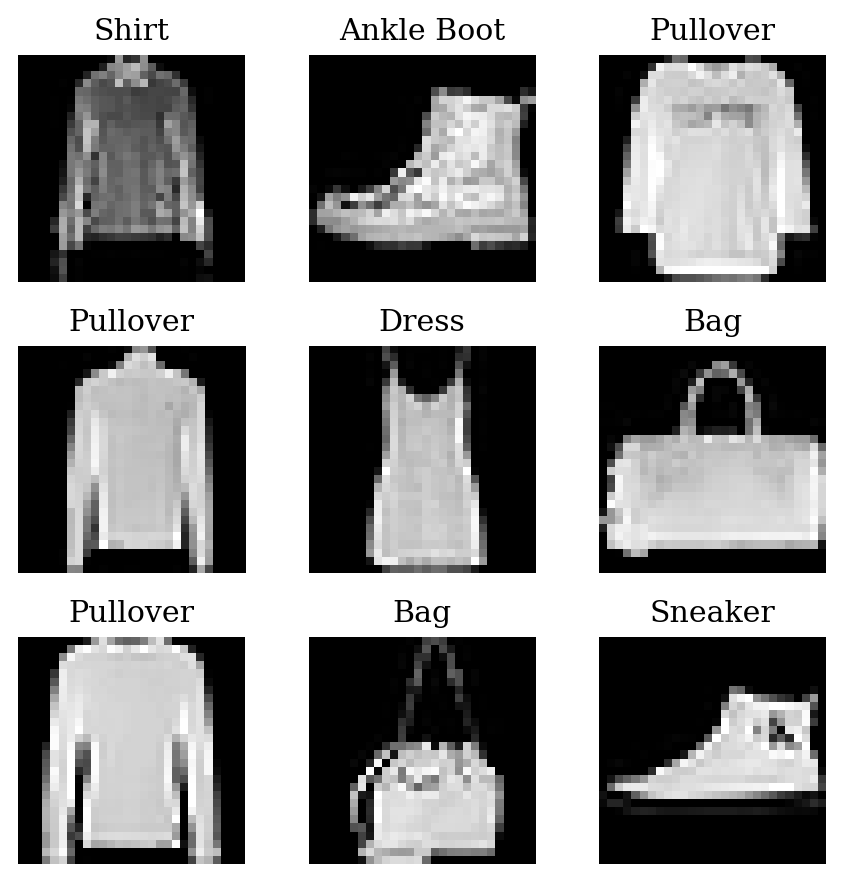

In [19]:
# Labels of the clothes based on the table given at the beggining of the notebook
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Plot of a random sample of tain_data
figure = plt.figure(figsize=(5, 5), dpi=180)
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(train_d), size=(1,)).item()
    img, label = train_d[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.tight_layout()
#plt.savefig('examples.jpg')

Let us make some statistical analysis regarding the labels. In doing so, we are going to be able to see if the dataset is imbalanced or not.

In [20]:
# Let us convert the targets tensors into a pandas DataFrame object to make easier the computations
df_train = pd.DataFrame(train_d.targets.numpy(), columns = ['Labels'])
df_test = pd.DataFrame(test_d.targets.numpy(), columns = ['Labels'])

Now we have a DataFrame object we can inspect the targets.

In [21]:
df_train.value_counts()

Labels
0         6000
1         6000
2         6000
3         6000
4         6000
5         6000
6         6000
7         6000
8         6000
9         6000
dtype: int64

In [22]:
df_test.value_counts()

Labels
0         1000
1         1000
2         1000
3         1000
4         1000
5         1000
6         1000
7         1000
8         1000
9         1000
dtype: int64

We can see that the training labels are perfectly balanced, making the training process easier than in the case of imbalanced classes. Note that we have labels that are encoded, so it is not needed to apply the label encoding method on the targets. To move forward, we have to define the function that will perform the training of the CNN.

In [24]:
# We define the training function
def train_loop(dataloader, model, loss_fn, optimizer):
    size = int(len(dataloader.dataset)/batch_size)
    tmp = []

    # We iterate over batches
    for batch, (X, y) in enumerate(dataloader):
        # We calculate the model's prediction
        pred = model(X)
        # With the model's prediction we calculate the loss function
        loss = loss_fn(pred, y)

        # We apply the backpropagation method
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Training progress
        loss, current = loss.item(), batch
        tmp.append(loss)
        print(f"Actual batch = {current} | Loss = {loss:>7f} | Processed samples: [{current:>2d}/{size:>2d}]")
    
    tmp = np.array(tmp)
    loss_avg = tmp.sum()/len(tmp)
    return loss_avg

# We define the test function
def test_loop(dataloader, model, loss_fn, num_batches):
    size = int(len(dataloader.dataset)/batch_size)
    test_loss = 0
    j = 0
    
    # To test, we need to deactivate the calculation of the gradients
    with torch.no_grad():
        # We iterate over batches
        for X, y in dataloader:
            # Model's prection
            pred = model(X)
            # Corresponding errors, which we acumulate in a total value
            test_loss += loss_fn(pred, y).item()
            j += 1
            
    # We calculate the total loss and print it
    test_loss /= j
    print(f"Test Error: Avg loss = {test_loss:>8f} \n")
    return test_loss

In order to train the model, we need to instanciate an optimizer object and a loss function object. Let us do this.

In [25]:
# Loss function object. It is a Medium Squared Error.
loss_fn = nn.MSELoss()

# We instantiate an optimizer. In this case we choose an Adam optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=lr, eps=1e-08, weight_decay=0, amsgrad=False)

In [26]:
# Print model's state_dict size to gain some perspective about the model
print("Model's state_dict size:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict size:
cnn.0.weight 	 torch.Size([1, 1, 7, 7])
cnn.0.bias 	 torch.Size([1])
cnn.3.weight 	 torch.Size([1, 1, 5, 5])
cnn.3.bias 	 torch.Size([1])
cnn.6.weight 	 torch.Size([98, 196])
cnn.6.bias 	 torch.Size([98])
cnn.9.weight 	 torch.Size([10, 98])
cnn.9.bias 	 torch.Size([10])


We will plot the loss function against the epochs

In [27]:
# We define a loss array to plot the training loss function and the testing loss function.
# Comment if you have to load a trained model.
loss_to_plot = []
loss_to_plot_test = []

We are ready to train the model. Let us train it during $n_{epochs}$ epochs, as defined above.

In [28]:
""" 
We train the model iterating over the different epochs. Comment if you have to load a trained model."""
for t in range(n_epochs):
    print(f"Epoch {t+1}\n=============================================")
    loss_to_plot.append(train_loop(train_dl, model, loss_fn, optimizer))
    loss_to_plot_test.append(test_loop(test_dl, model, loss_fn, batch_size))
print("Done!")

Epoch 1


/home/scollazo/anaconda3/envs/env-torchode/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Actual batch = 0 | Loss = 0.090110 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.090008 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.089941 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.089807 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.089687 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.089647 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.089401 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.089248 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.089012 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.088836 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.088475 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.088198 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.087913 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.087947 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.087185 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.086726

Actual batch = 4 | Loss = 0.045620 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.042922 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.042847 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.043067 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.044457 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.042369 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.043253 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.045812 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.043098 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.042033 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.040562 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.039234 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.043778 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.043577 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.041838 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.04

Actual batch = 8 | Loss = 0.038156 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.038782 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.037805 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.037060 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.037291 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.036529 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.038195 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.036595 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.036544 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.038634 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.038093 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.036996 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.038910 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.037124 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.037480 | Processed samples: [22/60]
Actual batch = 23 | Loss = 

Actual batch = 12 | Loss = 0.034617 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.036191 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.034724 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.035017 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.030741 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.034126 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.031137 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.035554 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.033475 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.033949 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.033797 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.033507 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.036387 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.034782 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.034189 | Processed samples: [26/60]
Actual batch = 27 | Loss 

Actual batch = 16 | Loss = 0.030424 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.030468 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.029488 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.032360 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.035842 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.031295 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.031860 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.032354 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.033110 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.031790 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.032744 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.032373 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.031212 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.031443 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.030864 | Processed samples: [30/60]
Actual batch = 31 | Loss 

Actual batch = 20 | Loss = 0.031981 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.030914 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.031591 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.029496 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.028996 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.032155 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.027399 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.031746 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.031764 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.031546 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.029812 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.030567 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.031062 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.032732 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.031535 | Processed samples: [34/60]
Actual batch = 35 | Loss 

Actual batch = 25 | Loss = 0.031440 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.030294 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.029968 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.031690 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.030874 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.029636 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.030433 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.028602 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.030539 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.028599 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.027769 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.031526 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.030885 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.031546 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.028975 | Processed samples: [39/60]
Actual batch = 40 | Loss 

Actual batch = 29 | Loss = 0.028988 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.030133 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.029623 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.027791 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.028540 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.030542 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.029151 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.028181 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.030408 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.029859 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.028244 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.030056 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.028845 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.028400 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.028982 | Processed samples: [43/60]
Actual batch = 44 | Loss 

Actual batch = 33 | Loss = 0.028596 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.030581 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.028663 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.029455 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.031582 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.029602 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.029990 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.028145 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.029924 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.028653 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.028647 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.029130 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.029704 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.026183 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.028579 | Processed samples: [47/60]
Actual batch = 48 | Loss 

Actual batch = 37 | Loss = 0.026223 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.029681 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.029197 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.028110 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.027397 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.028098 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.026123 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.028379 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.031242 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.029958 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.029771 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.029543 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.029748 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.028228 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.027393 | Processed samples: [51/60]
Actual batch = 52 | Loss 

Actual batch = 42 | Loss = 0.027317 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.028835 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.029196 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.028723 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.027601 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.028702 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.027885 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.028574 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.025976 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.027938 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.025323 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.028337 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.028916 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.028299 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.027113 | Processed samples: [56/60]
Actual batch = 57 | Loss 

Actual batch = 46 | Loss = 0.028680 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.027862 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.025674 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.028464 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.024836 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.030723 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.027567 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.026830 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.025922 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.026539 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.023962 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.028437 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.026282 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.029494 | Processed samples: [59/60]
Test Error: Avg loss = 0.028478 

Epoch 24
Actual batch = 0 | Loss = 0.029076 | Processed 

Actual batch = 51 | Loss = 0.027106 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.024963 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.028321 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.027096 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.026571 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.025115 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.027054 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.027434 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.025944 | Processed samples: [59/60]
Test Error: Avg loss = 0.028488 

Epoch 26
Actual batch = 0 | Loss = 0.026964 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.026286 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.028240 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.027784 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.027904 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.026214 | Processed sampl

Actual batch = 55 | Loss = 0.025350 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.027106 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.028480 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.024898 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.029359 | Processed samples: [59/60]
Test Error: Avg loss = 0.027964 

Epoch 28
Actual batch = 0 | Loss = 0.026715 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.025019 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.027169 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.026116 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.026802 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.027236 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.025999 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.026826 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.027564 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.028358 | Processed samples: 

Actual batch = 59 | Loss = 0.027308 | Processed samples: [59/60]
Test Error: Avg loss = 0.027738 

Epoch 30
Actual batch = 0 | Loss = 0.025948 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.026334 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.026452 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.026365 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.027007 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.026934 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.028851 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.027214 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.027293 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.027613 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.024340 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.024645 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.025701 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.026648 | Processed samples: 

Actual batch = 2 | Loss = 0.024492 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.028180 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.026674 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.023339 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.026728 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.026390 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.026787 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.027355 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.028045 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.028571 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.027508 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.025601 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.025901 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.026028 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.026057 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.0242

Actual batch = 7 | Loss = 0.023798 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.026330 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.026862 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.026478 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.028105 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.022827 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.023522 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.026328 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.026450 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.026093 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.025843 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.023511 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.027586 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.027663 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.028029 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0

Actual batch = 11 | Loss = 0.027111 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.026222 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.024928 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.025078 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.026864 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.027369 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.025620 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.024008 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.025028 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.025243 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.026477 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.025019 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.023989 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.025089 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.026825 | Processed samples: [25/60]
Actual batch = 26 | Loss 

Actual batch = 16 | Loss = 0.025265 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.026563 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.024693 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.025905 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.024944 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.026279 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.025567 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.025311 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023675 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.024358 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.024420 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.023839 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.025653 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.025045 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.026104 | Processed samples: [30/60]
Actual batch = 31 | Loss 

Actual batch = 20 | Loss = 0.025683 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.023496 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.025449 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.025704 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023800 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.025785 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.026674 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.022368 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.024473 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.024869 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.025106 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.023710 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.027828 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.024381 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.025616 | Processed samples: [34/60]
Actual batch = 35 | Loss 

Actual batch = 25 | Loss = 0.025919 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.026588 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.026718 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.023235 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.023500 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.026079 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.026426 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.028073 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.025752 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.025935 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.024610 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.024795 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.024705 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.024069 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.024019 | Processed samples: [39/60]
Actual batch = 40 | Loss 

Actual batch = 29 | Loss = 0.026343 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.025920 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.026551 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.027099 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.021624 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.024489 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.024265 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.025063 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.027122 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.024246 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.026903 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.024510 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.023078 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.025307 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.024473 | Processed samples: [43/60]
Actual batch = 44 | Loss 

Actual batch = 34 | Loss = 0.025995 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.025337 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.025400 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.026866 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.025870 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.024453 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.023883 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.024881 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.025953 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.025462 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.024224 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022221 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.024605 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.023626 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.024343 | Processed samples: [48/60]
Actual batch = 49 | Loss 

Actual batch = 39 | Loss = 0.025018 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.024376 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.025636 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.025669 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.023552 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.026201 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.023851 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.024811 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.025615 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.025455 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.024693 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.023701 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.026214 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.023380 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.028375 | Processed samples: [53/60]
Actual batch = 54 | Loss 

Actual batch = 44 | Loss = 0.022592 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.026486 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.020497 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.023923 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.023454 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022969 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.026788 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022372 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.025097 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.026061 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.023176 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.027659 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.025293 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.024968 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.025104 | Processed samples: [58/60]
Actual batch = 59 | Loss 

Actual batch = 48 | Loss = 0.026280 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.028283 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021805 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022733 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.022540 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.023881 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.025135 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.025817 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.025530 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.024782 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.025293 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.026195 | Processed samples: [59/60]
Test Error: Avg loss = 0.026786 

Epoch 53
Actual batch = 0 | Loss = 0.026407 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.025881 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.023312 | Processed sa

Actual batch = 53 | Loss = 0.027677 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.024771 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.023501 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.024439 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.022858 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.023038 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.024686 | Processed samples: [59/60]
Test Error: Avg loss = 0.026344 

Epoch 55
Actual batch = 0 | Loss = 0.022971 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.023715 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.025637 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.024002 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.023959 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.025711 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.025337 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.021899 | Processed samples

Actual batch = 57 | Loss = 0.025129 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.026008 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.024400 | Processed samples: [59/60]
Test Error: Avg loss = 0.026793 

Epoch 57
Actual batch = 0 | Loss = 0.023336 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.024810 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.024963 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.025941 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.025176 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.027385 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.025151 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.024503 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.024004 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.026420 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.024851 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.023565 | Processed samples: 

Actual batch = 1 | Loss = 0.024175 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.025967 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.024339 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.024204 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.022906 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.023666 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.024850 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.026255 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.025507 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.026612 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.023700 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.022190 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.025137 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.023398 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.023385 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.02190

Actual batch = 5 | Loss = 0.024476 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.025161 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.024001 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.023392 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.022105 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.024035 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.023376 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.023771 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.023859 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.023875 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.023490 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.023900 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023148 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.021450 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.024739 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.0

Actual batch = 9 | Loss = 0.026261 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.024789 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.024699 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.025452 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.025785 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022857 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.023029 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.023222 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.021036 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.024053 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.025646 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023578 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.025833 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.025117 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.023330 | Processed samples: [23/60]
Actual batch = 24 | Loss =

Actual batch = 14 | Loss = 0.020660 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.024030 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.022322 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.025347 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.024889 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.023771 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021966 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.024161 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.024446 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.024925 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023124 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.020585 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.023372 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.024161 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022412 | Processed samples: [28/60]
Actual batch = 29 | Loss 

Actual batch = 18 | Loss = 0.023425 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.024307 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023974 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.022906 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.023341 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.024181 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.025596 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.025502 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.022879 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.025786 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022990 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.027282 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.023061 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.023500 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.026038 | Processed samples: [32/60]
Actual batch = 33 | Loss 

Actual batch = 22 | Loss = 0.023060 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.024906 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.021987 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.024031 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.023587 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.026216 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.024598 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.025661 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.025013 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.024289 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.024894 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.024463 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.024275 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022429 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.024509 | Processed samples: [36/60]
Actual batch = 37 | Loss 

Actual batch = 27 | Loss = 0.022299 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022403 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021800 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.023750 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.026124 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021579 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.025147 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.024677 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022143 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.024089 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.023737 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.024937 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.024305 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.022486 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.023557 | Processed samples: [41/60]
Actual batch = 42 | Loss 

Actual batch = 31 | Loss = 0.022493 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.025773 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.023410 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.025325 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.025055 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.022847 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.024866 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.024449 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.025729 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.023420 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.024398 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.024781 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.023923 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.022772 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.023077 | Processed samples: [45/60]
Actual batch = 46 | Loss 

Actual batch = 36 | Loss = 0.020253 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.023163 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.023602 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.024797 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.023366 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.023566 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.023117 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.023814 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.022951 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.023713 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.025541 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.022217 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021587 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.021759 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.022917 | Processed samples: [50/60]
Actual batch = 51 | Loss 

Actual batch = 40 | Loss = 0.022375 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021996 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.024947 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.025759 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.023754 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021397 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.026555 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.025917 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.022706 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.023731 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.022526 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.023102 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.024860 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.022053 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.022735 | Processed samples: [54/60]
Actual batch = 55 | Loss 

Actual batch = 44 | Loss = 0.023728 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.026712 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.026689 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.025577 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.024406 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022962 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021075 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.023692 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.024814 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.024094 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.023017 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.024062 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.025210 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.024484 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.024364 | Processed samples: [58/60]
Actual batch = 59 | Loss 

Actual batch = 49 | Loss = 0.024570 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.024014 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.023481 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.024033 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.024941 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.025269 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.023124 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.026371 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.023543 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.025000 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022430 | Processed samples: [59/60]
Test Error: Avg loss = 0.025954 

Epoch 82
Actual batch = 0 | Loss = 0.024355 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.023415 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.024537 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.022561 | Processed sam

Actual batch = 54 | Loss = 0.027947 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.023994 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.025018 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.023640 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.023120 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022865 | Processed samples: [59/60]
Test Error: Avg loss = 0.025601 

Epoch 84
Actual batch = 0 | Loss = 0.024263 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022681 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.021353 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.024933 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.023361 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021236 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.024422 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.025876 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022379 | Processed samples:

Actual batch = 58 | Loss = 0.021739 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.023999 | Processed samples: [59/60]
Test Error: Avg loss = 0.025509 

Epoch 86
Actual batch = 0 | Loss = 0.022751 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022986 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.024010 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.020684 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.026280 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.025619 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020012 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.023283 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022516 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.021971 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021606 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.023434 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.022292 | Processed samples: 

Actual batch = 1 | Loss = 0.020048 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.022748 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.023084 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.023103 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.024256 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.023336 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.020538 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.025460 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.023644 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.024097 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.025449 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.024189 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.023145 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022768 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.023653 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.02199

Actual batch = 5 | Loss = 0.021251 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021578 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022320 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.024281 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.023758 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.023446 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022184 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.022047 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.023229 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022473 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.023098 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.023605 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023076 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.024020 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.024513 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.0

Actual batch = 10 | Loss = 0.019899 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022254 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.021468 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.021294 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.023600 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022665 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.024192 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023279 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.026046 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.025743 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023905 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.022598 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021840 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.022827 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023392 | Processed samples: [24/60]
Actual batch = 25 | Loss 

Actual batch = 14 | Loss = 0.025756 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.024305 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.024979 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.022759 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.020405 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.022914 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021907 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.024666 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.025315 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.021743 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023222 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.023074 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.021378 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.025815 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.024205 | Processed samples: [28/60]
Actual batch = 29 | Loss 

Actual batch = 18 | Loss = 0.020672 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.022453 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021432 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.021317 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.023162 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.023525 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023608 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.022520 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.021447 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.024421 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.023939 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021554 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.023564 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.021440 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.023244 | Processed samples: [32/60]
Actual batch = 33 | Loss 

Actual batch = 23 | Loss = 0.022895 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023295 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.023044 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.023004 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.022906 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.021608 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.022695 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.022036 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.024604 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.022514 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.022684 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.024045 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022779 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.024651 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.021962 | Processed samples: [37/60]
Actual batch = 38 | Loss 

Actual batch = 27 | Loss = 0.022107 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.021759 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.025851 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.022471 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.023615 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021764 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.023180 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.021355 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022062 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.025357 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.023763 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.025896 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.024426 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.023226 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021522 | Processed samples: [41/60]
Actual batch = 42 | Loss 

Actual batch = 31 | Loss = 0.022125 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.020730 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.024687 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.023757 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022919 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.023191 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.023071 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.024273 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.023919 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021834 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021816 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.023128 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.023762 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.021967 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022283 | Processed samples: [45/60]
Actual batch = 46 | Loss 

Actual batch = 35 | Loss = 0.024596 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.022224 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.023361 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.019999 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.021785 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.023469 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.020292 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.022422 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.022977 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.025769 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022723 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.024946 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.022687 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021682 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022524 | Processed samples: [49/60]
Actual batch = 50 | Loss 

Actual batch = 40 | Loss = 0.021780 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021420 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.023450 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.023556 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.023872 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.024211 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.024455 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.025942 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.024920 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022788 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.022722 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.019717 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.023729 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.021751 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.024042 | Processed samples: [54/60]
Actual batch = 55 | Loss 

Actual batch = 44 | Loss = 0.021345 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022991 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.022444 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.023449 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.023466 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.021396 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021666 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.020928 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.023201 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.024049 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020759 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.021830 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.023520 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.022876 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.025152 | Processed samples: [58/60]
Actual batch = 59 | Loss 

Actual batch = 48 | Loss = 0.024464 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022256 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021808 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022682 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.022423 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.024218 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.021167 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.023307 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.021949 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.019915 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.021758 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.021438 | Processed samples: [59/60]
Test Error: Avg loss = 0.025372 

Epoch 111
Actual batch = 0 | Loss = 0.022186 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.025129 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.023358 | Processed s

Actual batch = 53 | Loss = 0.022419 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020322 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.022779 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.021700 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.022127 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.024657 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022594 | Processed samples: [59/60]
Test Error: Avg loss = 0.025159 

Epoch 113
Actual batch = 0 | Loss = 0.022661 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.021786 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.020703 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021618 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.021678 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.023820 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021232 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022979 | Processed sample

Actual batch = 57 | Loss = 0.024024 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.022744 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022253 | Processed samples: [59/60]
Test Error: Avg loss = 0.025165 

Epoch 115
Actual batch = 0 | Loss = 0.023545 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.024231 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.022565 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021911 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.022302 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.024202 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021010 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.024481 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022442 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.022584 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020785 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022813 | Processed samples:

Actual batch = 1 | Loss = 0.022857 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.021859 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.023572 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.021441 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021501 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.025224 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022038 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022732 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.021200 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.023906 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.025671 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.023871 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.023252 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022913 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.023266 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.02218

Actual batch = 5 | Loss = 0.021260 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.019038 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022378 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021635 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.023670 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.022535 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.020559 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.024382 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.022227 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.020733 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022148 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.023664 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.021580 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.021965 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.023550 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.0

Actual batch = 9 | Loss = 0.024931 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020420 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022653 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.020581 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.021630 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022325 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.025049 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.023914 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023199 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.023178 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.021712 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023094 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.021222 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021507 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.023231 | Processed samples: [23/60]
Actual batch = 24 | Loss =

Actual batch = 13 | Loss = 0.022078 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.023105 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022558 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.025398 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.020505 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.025109 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.019287 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.022107 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.022050 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021518 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.022516 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.022224 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.022965 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.021715 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019565 | Processed samples: [27/60]
Actual batch = 28 | Loss 

Actual batch = 18 | Loss = 0.020683 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.023360 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021206 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.024184 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.024362 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.020779 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.022479 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.023118 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.020903 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.021237 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022090 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.023041 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.022837 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.019919 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021535 | Processed samples: [32/60]
Actual batch = 33 | Loss 

Actual batch = 22 | Loss = 0.023530 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.022987 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023607 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.021234 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.023344 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019818 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022432 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021841 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.023056 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.023348 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.022331 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.022828 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.020939 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.020602 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.023556 | Processed samples: [36/60]
Actual batch = 37 | Loss 

Actual batch = 26 | Loss = 0.020715 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.023568 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.023741 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021024 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.024590 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.022246 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021179 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020918 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.021079 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022018 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.021300 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.022834 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.024526 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.023126 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.019598 | Processed samples: [40/60]
Actual batch = 41 | Loss 

Actual batch = 31 | Loss = 0.021349 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.023214 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020934 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.023559 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.021769 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.022818 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.023447 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020909 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.023690 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.023835 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.020219 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.021814 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.023289 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.022480 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021473 | Processed samples: [45/60]
Actual batch = 46 | Loss 

Actual batch = 35 | Loss = 0.022903 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.023005 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.021133 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020175 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.021009 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.022047 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.023347 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.024093 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019632 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.019690 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.023333 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.021108 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.023320 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.022908 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.020811 | Processed samples: [49/60]
Actual batch = 50 | Loss 

Actual batch = 40 | Loss = 0.023263 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.022901 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.022124 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.021769 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.020961 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.024582 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.022831 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.020305 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021544 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.023002 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.023460 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021320 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.021256 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.023050 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.022850 | Processed samples: [54/60]
Actual batch = 55 | Loss 

Actual batch = 45 | Loss = 0.019389 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.021916 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.022447 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.022246 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.020562 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021528 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021890 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.022091 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.023328 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.022945 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.021245 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.021361 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.024256 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.022124 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.023486 | Processed samples: [59/60]
Test Error: Avg loss = 0.

Actual batch = 50 | Loss = 0.022720 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.023468 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.022370 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.022743 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.022935 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.022133 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.020638 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.024279 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.021863 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.020053 | Processed samples: [59/60]
Test Error: Avg loss = 0.025043 

Epoch 140
Actual batch = 0 | Loss = 0.023675 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.021868 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.022793 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021413 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.023223 | Processed sam

Actual batch = 55 | Loss = 0.026150 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.021213 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.021400 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.020369 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.021201 | Processed samples: [59/60]
Test Error: Avg loss = 0.025133 

Epoch 142
Actual batch = 0 | Loss = 0.024416 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022286 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.021651 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.023465 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.023132 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.025057 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020025 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.019235 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021926 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.022410 | Processed samples:

Actual batch = 59 | Loss = 0.023447 | Processed samples: [59/60]
Test Error: Avg loss = 0.025091 

Epoch 144
Actual batch = 0 | Loss = 0.021317 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.023583 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.021006 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.019792 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.020921 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019727 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020271 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.019662 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021892 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.022813 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020656 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.023142 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.021358 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.023889 | Processed samples:

Actual batch = 2 | Loss = 0.019334 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021554 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.023563 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019742 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021719 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.021660 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022047 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.024300 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021908 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.020356 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.022082 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.019290 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022456 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022175 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.022549 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.0223

Actual batch = 7 | Loss = 0.024353 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021830 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.024044 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.022834 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022680 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.020678 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.021009 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022122 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.020926 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.022915 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.020103 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.022845 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.021311 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023568 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.022147 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0

Actual batch = 11 | Loss = 0.022364 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019751 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.022089 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.020131 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.019827 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.023378 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.021856 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.019524 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020612 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.022749 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.021650 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.023488 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.020508 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023257 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.022302 | Processed samples: [25/60]
Actual batch = 26 | Loss 

Actual batch = 15 | Loss = 0.021631 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.021009 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.021266 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.024383 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.024354 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.022883 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020532 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.022482 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.023331 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023663 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.021702 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.021859 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.024284 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.020677 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021044 | Processed samples: [29/60]
Actual batch = 30 | Loss 

Actual batch = 19 | Loss = 0.021759 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.020407 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.021846 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021314 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.021134 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.020915 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.020072 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.023104 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.023203 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022297 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.020248 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.023450 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.020594 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.019429 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.021446 | Processed samples: [33/60]
Actual batch = 34 | Loss 

Actual batch = 23 | Loss = 0.022587 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.018577 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.023799 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.022800 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.020283 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.023468 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.022039 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.019276 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.022993 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021069 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.019166 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.023330 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.023461 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.024210 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.022372 | Processed samples: [37/60]
Actual batch = 38 | Loss 

Actual batch = 27 | Loss = 0.020448 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.024399 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.023494 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.021584 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.023149 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.020685 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.018849 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.021373 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.019058 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.022646 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.020729 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.021563 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.024109 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021824 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021887 | Processed samples: [41/60]
Actual batch = 42 | Loss 

Actual batch = 31 | Loss = 0.021570 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021631 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.022256 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.022575 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.024272 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.021429 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.019135 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.018817 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.022049 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.022135 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.023528 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.021197 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019648 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.020903 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.023012 | Processed samples: [45/60]
Actual batch = 46 | Loss 

Actual batch = 35 | Loss = 0.019068 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.022419 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.021705 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020867 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.020503 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.022021 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.023838 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.021294 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019764 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.019549 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021547 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.020278 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.023501 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021729 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.020376 | Processed samples: [49/60]
Actual batch = 50 | Loss 

Actual batch = 39 | Loss = 0.022821 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021644 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.019470 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.020000 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.023621 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.020609 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.023759 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.021815 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.019699 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.019398 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.021348 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021480 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021760 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.024461 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.022666 | Processed samples: [53/60]
Actual batch = 54 | Loss 

Actual batch = 43 | Loss = 0.021807 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.022727 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.020294 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.019278 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.020759 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021057 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.021368 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.024593 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022453 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.021423 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.021928 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.021713 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.021535 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.023565 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.022280 | Processed samples: [57/60]
Actual batch = 58 | Loss 

Actual batch = 48 | Loss = 0.021676 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.021665 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.022829 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021459 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.021503 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.020115 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.022945 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.021506 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.020212 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.021989 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.023956 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022686 | Processed samples: [59/60]
Test Error: Avg loss = 0.024981 

Epoch 169
Actual batch = 0 | Loss = 0.021720 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022186 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.023334 | Processed s

Actual batch = 53 | Loss = 0.020808 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.022428 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.020379 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.020001 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.019251 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.019244 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.021079 | Processed samples: [59/60]
Test Error: Avg loss = 0.025050 

Epoch 171
Actual batch = 0 | Loss = 0.021333 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.018957 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.019895 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.022621 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.025428 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021956 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020363 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.023395 | Processed sample

Actual batch = 58 | Loss = 0.020727 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022124 | Processed samples: [59/60]
Test Error: Avg loss = 0.025120 

Epoch 173
Actual batch = 0 | Loss = 0.019619 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022159 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.020134 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.022861 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.019644 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.022583 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.023210 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022005 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022325 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.020592 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020322 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.019912 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.023591 | Processed samples:

Actual batch = 1 | Loss = 0.020345 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.021733 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.022776 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.022241 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.022482 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021956 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.020766 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.019996 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.020629 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020047 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.020592 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019695 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.022161 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.021307 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022306 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.02221

Actual batch = 6 | Loss = 0.022184 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.020068 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.020891 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.017468 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021729 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.021295 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.020332 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.022783 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.020798 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.020204 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.019608 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.021533 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.023007 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.022515 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.020932 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.

Actual batch = 10 | Loss = 0.024375 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022495 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.021777 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.019718 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.021357 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.020040 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.022199 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.022588 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.020295 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020720 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.019198 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.024752 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021941 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.022831 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.022367 | Processed samples: [24/60]
Actual batch = 25 | Loss 

Actual batch = 15 | Loss = 0.022106 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.022756 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023174 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.019572 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.018436 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023802 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020070 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.022510 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.018875 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.023541 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.021579 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.022828 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.018498 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022528 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.022134 | Processed samples: [29/60]
Actual batch = 30 | Loss 

Actual batch = 19 | Loss = 0.023670 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.019099 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020105 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.019410 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.021668 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.019757 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.020303 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.020437 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.021318 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.020135 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.020790 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.019994 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.023091 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.022291 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.023258 | Processed samples: [33/60]
Actual batch = 34 | Loss 

Actual batch = 24 | Loss = 0.018757 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.021319 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.023409 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.021779 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.021216 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.022939 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.022033 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.021897 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021128 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.023863 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.021482 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.020806 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.020274 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.022780 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.022115 | Processed samples: [38/60]
Actual batch = 39 | Loss 

Actual batch = 28 | Loss = 0.019897 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.022267 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.023527 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.021422 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.020645 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.021992 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.022195 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022363 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.021127 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.022622 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.021554 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.021287 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.020843 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.024031 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.019818 | Processed samples: [42/60]
Actual batch = 43 | Loss 

Actual batch = 32 | Loss = 0.022633 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020060 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.020825 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.021956 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.018718 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.021358 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020843 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.019737 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021024 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.023718 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.023631 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.021589 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.021554 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021111 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.021544 | Processed samples: [46/60]
Actual batch = 47 | Loss 

Actual batch = 37 | Loss = 0.022485 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.021473 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.018882 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.020687 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.019070 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.020352 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.022991 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.019210 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.020739 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.022010 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.021434 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.022811 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022399 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.019980 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022799 | Processed samples: [51/60]
Actual batch = 52 | Loss 

Actual batch = 42 | Loss = 0.021776 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019266 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.021824 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.019834 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.019752 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.020594 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021105 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.018627 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.022400 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021047 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.024175 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.020267 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.021474 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.022311 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.020016 | Processed samples: [56/60]
Actual batch = 57 | Loss 

Actual batch = 46 | Loss = 0.021394 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.021753 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.019564 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.020680 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.023024 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.020689 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.019446 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.021052 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.019127 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.022049 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.018934 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.023232 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.020499 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022701 | Processed samples: [59/60]
Test Error: Avg loss = 0.024958 

Epoch 196
Actual batch = 0 | Loss = 0.022639 | Processed

Actual batch = 51 | Loss = 0.018937 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.020023 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.020833 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020412 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.021827 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.021166 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.021157 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.024144 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022719 | Processed samples: [59/60]
Test Error: Avg loss = 0.025106 

Epoch 198
Actual batch = 0 | Loss = 0.022776 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.019258 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.019853 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021312 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.023714 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019634 | Processed samp

Actual batch = 55 | Loss = 0.019649 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.019766 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.019868 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.021115 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.023327 | Processed samples: [59/60]
Test Error: Avg loss = 0.024662 

Epoch 200
Actual batch = 0 | Loss = 0.021952 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022310 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.022046 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.022347 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.020646 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.020588 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.022614 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022247 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021036 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.021892 | Processed samples:

Actual batch = 59 | Loss = 0.023964 | Processed samples: [59/60]
Test Error: Avg loss = 0.025039 

Epoch 202
Actual batch = 0 | Loss = 0.020726 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.021665 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.018695 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021040 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.021199 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021333 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020593 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.018718 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.020919 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.022276 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.022588 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022877 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019401 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.020650 | Processed samples:

Actual batch = 2 | Loss = 0.021354 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.020903 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.020748 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021670 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020663 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.020384 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.020673 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.020258 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.022212 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.021578 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.022903 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.021591 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.020535 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.020483 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.023010 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.0236

Actual batch = 6 | Loss = 0.022911 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.019301 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021729 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.022746 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021212 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.021270 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.020130 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.021888 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.021459 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022501 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.019703 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.020503 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.022887 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020927 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.022088 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.

Actual batch = 10 | Loss = 0.018654 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.021362 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019928 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.021043 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.022271 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022714 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.021216 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.024448 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.022239 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.018118 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021589 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.024863 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021363 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.020397 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.021207 | Processed samples: [24/60]
Actual batch = 25 | Loss 

Actual batch = 14 | Loss = 0.022148 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.019266 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.021439 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023042 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.022166 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020867 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023258 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.023638 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.020493 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.019427 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.022554 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.019455 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.020626 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.022689 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.019425 | Processed samples: [28/60]
Actual batch = 29 | Loss 

Actual batch = 18 | Loss = 0.020494 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020710 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.020860 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.019759 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.022421 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.018885 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.021805 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.023435 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.021579 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.020522 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.021350 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.020019 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.019949 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.022059 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.022172 | Processed samples: [32/60]
Actual batch = 33 | Loss 

Actual batch = 22 | Loss = 0.023519 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.020871 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.020647 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.021543 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.020200 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.017992 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.020922 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.023597 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.021940 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.022939 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.022989 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.021224 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.020024 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.023635 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.021945 | Processed samples: [36/60]
Actual batch = 37 | Loss 

Actual batch = 26 | Loss = 0.021821 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019360 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022796 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.022150 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.023948 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.019876 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021080 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020674 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.017458 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.022212 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.021077 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.021633 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020957 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.018909 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021269 | Processed samples: [40/60]
Actual batch = 41 | Loss 

Actual batch = 30 | Loss = 0.020017 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.021092 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021385 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.023032 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.019628 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.021538 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.022871 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.018427 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020694 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.022233 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.020522 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.022653 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.018691 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.020774 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.023406 | Processed samples: [44/60]
Actual batch = 45 | Loss 

Actual batch = 35 | Loss = 0.021333 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.019972 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.021433 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020993 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.019451 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021717 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021392 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.020688 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.021365 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.018555 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021559 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.020717 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.020106 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.023790 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.021156 | Processed samples: [49/60]
Actual batch = 50 | Loss 

Actual batch = 40 | Loss = 0.023456 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.022612 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.021594 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019996 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.022511 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022163 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.022945 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.024317 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021160 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.021574 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.018852 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022329 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.021872 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.018824 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.019719 | Processed samples: [54/60]
Actual batch = 55 | Loss 

Actual batch = 44 | Loss = 0.017971 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021034 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.021470 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.019747 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021896 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022093 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.020684 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.019471 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.020888 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.019640 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.021295 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.021516 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.021092 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.020090 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.021164 | Processed samples: [58/60]
Actual batch = 59 | Loss 

Actual batch = 49 | Loss = 0.022611 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.020077 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022849 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.021311 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.020648 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.022090 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.021770 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.022073 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.021589 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.019391 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.021120 | Processed samples: [59/60]
Test Error: Avg loss = 0.024706 

Epoch 227
Actual batch = 0 | Loss = 0.019598 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.020115 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.020061 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.019954 | Processed sa

Actual batch = 54 | Loss = 0.021959 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.019593 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.020267 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.018496 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.020630 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.020755 | Processed samples: [59/60]
Test Error: Avg loss = 0.025082 

Epoch 229
Actual batch = 0 | Loss = 0.020486 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.020466 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.022431 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.022252 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.018652 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019802 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021289 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.021359 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021071 | Processed samples

Actual batch = 58 | Loss = 0.022749 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022281 | Processed samples: [59/60]
Test Error: Avg loss = 0.024465 

Epoch 231
Actual batch = 0 | Loss = 0.017983 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.020798 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.019512 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.018965 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.022446 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019801 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020750 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.023922 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021170 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.018402 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.023061 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.018168 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019600 | Processed samples:

Actual batch = 1 | Loss = 0.020731 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.021664 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021473 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.022464 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021472 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020196 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.021243 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.020179 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.020663 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021656 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.020796 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019663 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.021455 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.023057 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.019162 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.02220

Actual batch = 6 | Loss = 0.020632 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.020102 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021217 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.019160 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021361 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.022424 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.022182 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.022292 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.019320 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.021751 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.019540 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.018948 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.024979 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020212 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023624 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.

Actual batch = 10 | Loss = 0.020449 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.021635 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019402 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.019590 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.023852 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022082 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.019014 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023396 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.020173 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020667 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.020944 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020305 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021473 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.021060 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.022510 | Processed samples: [24/60]
Actual batch = 25 | Loss 

Actual batch = 15 | Loss = 0.019243 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.020702 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.023306 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.021619 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.021564 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.023432 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020687 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.022318 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.020628 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.019281 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.022023 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.018935 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019778 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.019236 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.020844 | Processed samples: [29/60]
Actual batch = 30 | Loss 

Actual batch = 19 | Loss = 0.021963 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021865 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020025 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.022247 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.020681 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.022274 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.019332 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.019161 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019953 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.019705 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.019234 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.021890 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.022689 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.019593 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.021055 | Processed samples: [33/60]
Actual batch = 34 | Loss 

Actual batch = 23 | Loss = 0.021361 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.019319 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.021671 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.020041 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019300 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.020641 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.019790 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.022775 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.019809 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021948 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020737 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.021535 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.021010 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.022267 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.018706 | Processed samples: [37/60]
Actual batch = 38 | Loss 

Actual batch = 27 | Loss = 0.020673 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.019962 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.020556 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.021334 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.018209 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.021502 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020625 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.017700 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.020911 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.020379 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.019658 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.021393 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.021560 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.022821 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.019821 | Processed samples: [41/60]
Actual batch = 42 | Loss 

Actual batch = 32 | Loss = 0.019688 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020932 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.022615 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.019563 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.020434 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.020896 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.023904 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.023435 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.023026 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.020103 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.021174 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019964 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.020745 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021746 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.019561 | Processed samples: [46/60]
Actual batch = 47 | Loss 

Actual batch = 36 | Loss = 0.020678 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.018256 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.021996 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.019311 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021166 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.020921 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.018597 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019736 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.021916 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.021898 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.019089 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.021900 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.020056 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.019442 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021881 | Processed samples: [50/60]
Actual batch = 51 | Loss 

Actual batch = 40 | Loss = 0.021940 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021033 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.020786 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.021061 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.020387 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022727 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.020047 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.019997 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.020525 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.019997 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021602 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021876 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.022417 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.022338 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020243 | Processed samples: [54/60]
Actual batch = 55 | Loss 

Actual batch = 44 | Loss = 0.019733 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.019898 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.022027 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.019128 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.018197 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.019569 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.019804 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021741 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.020932 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.020345 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.021359 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.023535 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.019042 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.017833 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.020160 | Processed samples: [58/60]
Actual batch = 59 | Loss 

Actual batch = 49 | Loss = 0.021654 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.017483 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.019394 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.020256 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.022761 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020248 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.020148 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.023053 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.019500 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.020639 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.021575 | Processed samples: [59/60]
Test Error: Avg loss = 0.024595 

Epoch 256
Actual batch = 0 | Loss = 0.017203 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.023032 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.022227 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.019275 | Processed sa

Actual batch = 53 | Loss = 0.019157 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.019897 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.019522 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.020025 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.019200 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.019539 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.019272 | Processed samples: [59/60]
Test Error: Avg loss = 0.024739 

Epoch 258
Actual batch = 0 | Loss = 0.019480 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022089 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.019060 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021037 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.018242 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019038 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.023291 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.021540 | Processed sample

Actual batch = 57 | Loss = 0.019245 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.020329 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.020444 | Processed samples: [59/60]
Test Error: Avg loss = 0.024623 

Epoch 260
Actual batch = 0 | Loss = 0.019240 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022195 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.017922 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021451 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.019105 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021012 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020466 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022123 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022894 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.018120 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020868 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.019494 | Processed samples:

Actual batch = 1 | Loss = 0.020553 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.020201 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.019455 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.021226 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.021447 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021372 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.019247 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.018664 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.020715 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.018681 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.018952 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.021415 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.019973 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.021932 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.021879 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.02147

Actual batch = 5 | Loss = 0.020757 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021612 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.019895 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021856 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.020620 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020551 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.020769 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.020180 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.020705 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.019825 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.022326 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.020786 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.020628 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.021410 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.023662 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.0

Actual batch = 9 | Loss = 0.020207 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021097 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.020887 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.020568 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.020709 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.019084 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.019583 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.022326 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.019909 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.020122 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.020435 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.019072 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020799 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.019702 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.019699 | Processed samples: [23/60]
Actual batch = 24 | Loss =

Actual batch = 14 | Loss = 0.021919 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.018933 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.021764 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.022143 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.020541 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.019360 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021260 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020735 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.020681 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.021371 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.019789 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.020831 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.021015 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.021113 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.022121 | Processed samples: [28/60]
Actual batch = 29 | Loss 

Actual batch = 19 | Loss = 0.018916 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.020755 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.022727 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.020222 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.016983 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.017947 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.019768 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.022728 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.021128 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.020315 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021789 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.019610 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.019968 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.020109 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.018979 | Processed samples: [33/60]
Actual batch = 34 | Loss 

Actual batch = 23 | Loss = 0.019237 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.020873 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.020852 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.021356 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019083 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.021925 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021736 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.021273 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.017964 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.017461 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.020491 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.021557 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.020268 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.019721 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.020372 | Processed samples: [37/60]
Actual batch = 38 | Loss 

Actual batch = 28 | Loss = 0.022365 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.022880 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.020554 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.022337 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.020908 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.019723 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.021574 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.020046 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.021247 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.018825 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.020254 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.020347 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.021638 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.020596 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.021115 | Processed samples: [42/60]
Actual batch = 43 | Loss 

Actual batch = 33 | Loss = 0.018489 | Processed samples: [33/60]
Actual batch = 34 | Loss = 0.022098 | Processed samples: [34/60]
Actual batch = 35 | Loss = 0.020319 | Processed samples: [35/60]
Actual batch = 36 | Loss = 0.021619 | Processed samples: [36/60]
Actual batch = 37 | Loss = 0.021354 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.022251 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.021296 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.019926 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.021393 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.021789 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.020041 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.021907 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022071 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.018549 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.018014 | Processed samples: [47/60]
Actual batch = 48 | Loss 

Actual batch = 37 | Loss = 0.020139 | Processed samples: [37/60]
Actual batch = 38 | Loss = 0.021053 | Processed samples: [38/60]
Actual batch = 39 | Loss = 0.020252 | Processed samples: [39/60]
Actual batch = 40 | Loss = 0.020595 | Processed samples: [40/60]
Actual batch = 41 | Loss = 0.019359 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.020266 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.021132 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.019066 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.022858 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.021292 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.021737 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.021542 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.018939 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.021357 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.022064 | Processed samples: [51/60]
Actual batch = 52 | Loss 

Actual batch = 41 | Loss = 0.020849 | Processed samples: [41/60]
Actual batch = 42 | Loss = 0.020414 | Processed samples: [42/60]
Actual batch = 43 | Loss = 0.019576 | Processed samples: [43/60]
Actual batch = 44 | Loss = 0.022523 | Processed samples: [44/60]
Actual batch = 45 | Loss = 0.019758 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.022165 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.021056 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.020120 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.022051 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.020087 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021420 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.022716 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.020234 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020152 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.019856 | Processed samples: [55/60]
Actual batch = 56 | Loss 

Actual batch = 45 | Loss = 0.019657 | Processed samples: [45/60]
Actual batch = 46 | Loss = 0.021030 | Processed samples: [46/60]
Actual batch = 47 | Loss = 0.020465 | Processed samples: [47/60]
Actual batch = 48 | Loss = 0.019082 | Processed samples: [48/60]
Actual batch = 49 | Loss = 0.019488 | Processed samples: [49/60]
Actual batch = 50 | Loss = 0.019106 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.021218 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.021508 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.021191 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020186 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.018903 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.020860 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.020229 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.022668 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.022437 | Processed samples: [59/60]
Test Error: Avg loss = 0.

Actual batch = 50 | Loss = 0.019661 | Processed samples: [50/60]
Actual batch = 51 | Loss = 0.018273 | Processed samples: [51/60]
Actual batch = 52 | Loss = 0.019860 | Processed samples: [52/60]
Actual batch = 53 | Loss = 0.019947 | Processed samples: [53/60]
Actual batch = 54 | Loss = 0.020576 | Processed samples: [54/60]
Actual batch = 55 | Loss = 0.019516 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.023903 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.020789 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.024788 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.019966 | Processed samples: [59/60]
Test Error: Avg loss = 0.024790 

Epoch 285
Actual batch = 0 | Loss = 0.020292 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.020393 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.017694 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.019150 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.018683 | Processed sam

Actual batch = 55 | Loss = 0.020311 | Processed samples: [55/60]
Actual batch = 56 | Loss = 0.019331 | Processed samples: [56/60]
Actual batch = 57 | Loss = 0.020314 | Processed samples: [57/60]
Actual batch = 58 | Loss = 0.020611 | Processed samples: [58/60]
Actual batch = 59 | Loss = 0.018854 | Processed samples: [59/60]
Test Error: Avg loss = 0.024367 

Epoch 287
Actual batch = 0 | Loss = 0.019285 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.019707 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.022147 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.021184 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.020377 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.020004 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020737 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022090 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.019582 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.018579 | Processed samples:

Actual batch = 59 | Loss = 0.018309 | Processed samples: [59/60]
Test Error: Avg loss = 0.024966 

Epoch 289
Actual batch = 0 | Loss = 0.019990 | Processed samples: [ 0/60]
Actual batch = 1 | Loss = 0.022651 | Processed samples: [ 1/60]
Actual batch = 2 | Loss = 0.019774 | Processed samples: [ 2/60]
Actual batch = 3 | Loss = 0.019100 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.017885 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019836 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.020324 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.021279 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.022451 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.019405 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021900 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.020480 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.019743 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.022017 | Processed samples:

Actual batch = 3 | Loss = 0.020462 | Processed samples: [ 3/60]
Actual batch = 4 | Loss = 0.022586 | Processed samples: [ 4/60]
Actual batch = 5 | Loss = 0.019671 | Processed samples: [ 5/60]
Actual batch = 6 | Loss = 0.021033 | Processed samples: [ 6/60]
Actual batch = 7 | Loss = 0.022198 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.021399 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.020120 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.021058 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.019730 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.017854 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.019934 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.020290 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.018961 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.021647 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.022379 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.018

Actual batch = 7 | Loss = 0.017547 | Processed samples: [ 7/60]
Actual batch = 8 | Loss = 0.018677 | Processed samples: [ 8/60]
Actual batch = 9 | Loss = 0.019923 | Processed samples: [ 9/60]
Actual batch = 10 | Loss = 0.020295 | Processed samples: [10/60]
Actual batch = 11 | Loss = 0.023256 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.018019 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.022333 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.018574 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.021749 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.018866 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.018367 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.018826 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.022169 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.019862 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.019900 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0

Actual batch = 11 | Loss = 0.019794 | Processed samples: [11/60]
Actual batch = 12 | Loss = 0.021277 | Processed samples: [12/60]
Actual batch = 13 | Loss = 0.018880 | Processed samples: [13/60]
Actual batch = 14 | Loss = 0.018736 | Processed samples: [14/60]
Actual batch = 15 | Loss = 0.020825 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.020945 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.017560 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.022584 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.019822 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.019481 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.018937 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.016459 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.019841 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.018582 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.019851 | Processed samples: [25/60]
Actual batch = 26 | Loss 

Actual batch = 15 | Loss = 0.022810 | Processed samples: [15/60]
Actual batch = 16 | Loss = 0.017467 | Processed samples: [16/60]
Actual batch = 17 | Loss = 0.018485 | Processed samples: [17/60]
Actual batch = 18 | Loss = 0.019698 | Processed samples: [18/60]
Actual batch = 19 | Loss = 0.019874 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.019486 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.022015 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.019714 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.019625 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.018358 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.018898 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.018616 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.017735 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.020578 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021210 | Processed samples: [29/60]
Actual batch = 30 | Loss 

Actual batch = 19 | Loss = 0.018737 | Processed samples: [19/60]
Actual batch = 20 | Loss = 0.021518 | Processed samples: [20/60]
Actual batch = 21 | Loss = 0.020563 | Processed samples: [21/60]
Actual batch = 22 | Loss = 0.021613 | Processed samples: [22/60]
Actual batch = 23 | Loss = 0.021174 | Processed samples: [23/60]
Actual batch = 24 | Loss = 0.020601 | Processed samples: [24/60]
Actual batch = 25 | Loss = 0.021031 | Processed samples: [25/60]
Actual batch = 26 | Loss = 0.019650 | Processed samples: [26/60]
Actual batch = 27 | Loss = 0.019508 | Processed samples: [27/60]
Actual batch = 28 | Loss = 0.018426 | Processed samples: [28/60]
Actual batch = 29 | Loss = 0.021282 | Processed samples: [29/60]
Actual batch = 30 | Loss = 0.020342 | Processed samples: [30/60]
Actual batch = 31 | Loss = 0.020725 | Processed samples: [31/60]
Actual batch = 32 | Loss = 0.020310 | Processed samples: [32/60]
Actual batch = 33 | Loss = 0.021746 | Processed samples: [33/60]
Actual batch = 34 | Loss 

The model has been trained. It is better to save it before continue doing other things.

In [29]:
# Save the model in .pth file. Comment if you have to load a trained model.
torch.save(model.state_dict(), "trained_model.pth")

# To load it just uncomment the following lines
"""
model = Model()
model.load_state_dict(torch.load("trained_model.pth"))
model.eval()
"""

'\nmodel = Model()\nmodel.load_state_dict(torch.load("trained_model.pth"))\nmodel.eval()\n'

Now, it is time to check the precision of the predictions. In order to do so, we will plot both loss functions and we will make a *confusion matrix* plot to see the tendencies of the predictions.

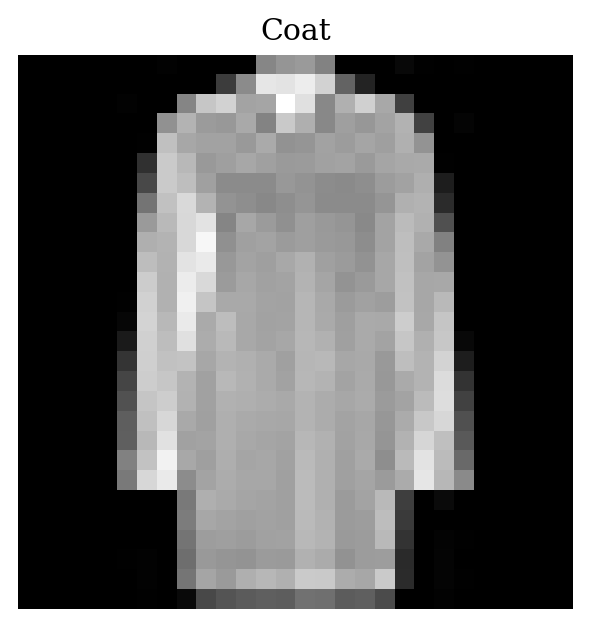

In [30]:
# We save both loss functions. Comment if you have to load a trained model.
np.savetxt('loss_to_plot.txt', loss_to_plot)
np.savetxt('loss_to_plot_test.txt', loss_to_plot_test)

# We choose an image and calculate the corresponding prediction generated by the model
ind = 156
for (X, y) in test_dl:
    pred_cpu = model(X)
    image_cpu = X[ind]
    break

pred_cpu = pred_cpu[ind].detach().numpy()

# We plot the image to be predicted and as a title the corresponding prediction
fig, ax = plt.subplots(1, 1, dpi=180)
fig.set_size_inches(4.0, 4.0)
ax.axis("off")
plt.title(labels_map[np.argmax(pred_cpu)])
ax.imshow(image_cpu.squeeze(), cmap="gray")

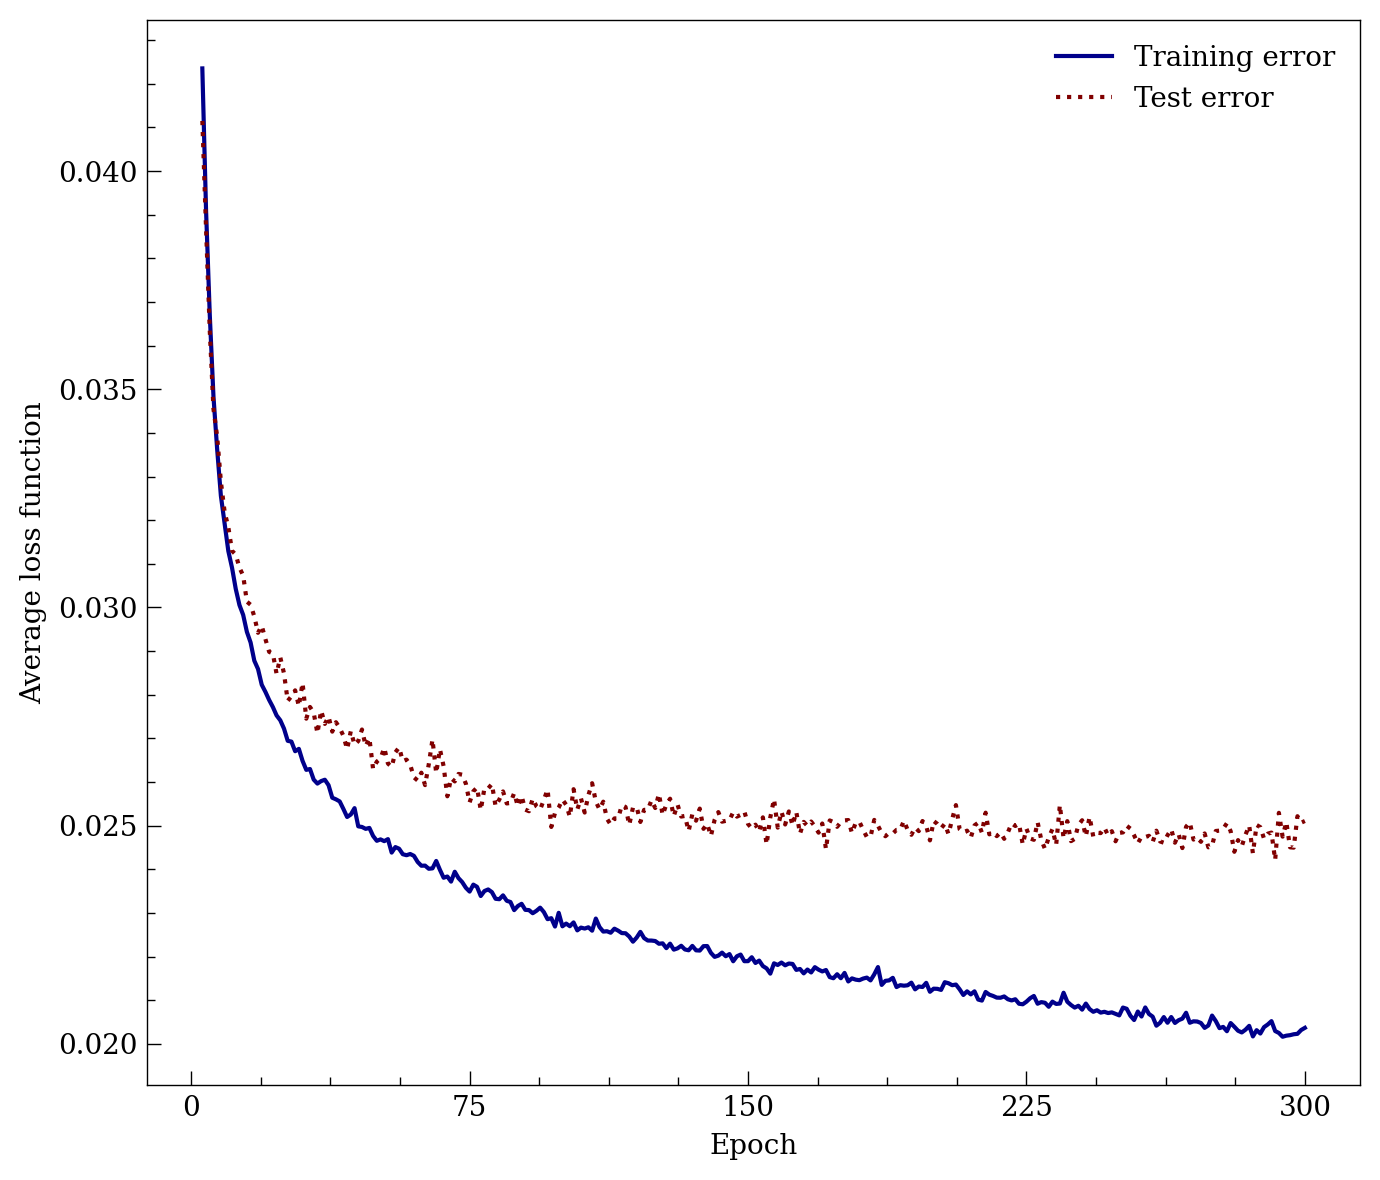

In [31]:
lp = np.loadtxt('loss_to_plot.txt')
lp_test = np.loadtxt('loss_to_plot_test.txt')

# Let us plot both loss functions
fig, ax = plt.subplots(1, 1, figsize=(7, 6), dpi=200)
ax.plot([i for i in range(3, n_epochs+1)], lp[2:], color='darkblue', lw=1.5, label='Training error')
ax.plot([i for i in range(3, n_epochs+1)], lp_test[2:], ls=':', color='maroon', lw=1.5, label='Test error')
ax.set_xlabel('Epoch')
ax.set_ylabel('Average loss function')
ax.set_xticks([0, 75, 150, 225, 300])
ax.set_xticklabels(['0', '75', '150', '225', '300'])
plt.legend()
plt.tight_layout()
#plt.savefig('loss.jpg')

In order to avoid the model being overfitted, it is needed to train it during 300 epochs, because if it is trained during a greater number of epochs, it can be seen a very small tendency of the average test loss function to start growing.

To conclude the analisys of the precision of the model, let us make a confusion matrix. That way, we will be able to see the tendencies of the model at the time of predict the input image.

In [32]:
# Let us define a function that get all the predictions made by the CNN
@torch.no_grad() # turn off gradients during inference for memory efficiency
def get_all_preds(network, dataloader):
    """ Function to return the number of correct predictions across data set """
    all_preds = torch.tensor([])
    model = network
    tmp_labels = np.array([])
    for batch in dataloader:
        images, labels = batch
        tmp_labels = np.concatenate((tmp_labels, labels.argmax(1).numpy()))
        preds = model(images) # get preds
        all_preds = torch.cat((all_preds, preds), dim=0) # join along existing axis
    
    return all_preds, tmp_labels

# Let us define the function that plots the confusion matrix
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm)/np.sum(cm).astype('float')
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Blues')    # Choose Blues by default

    plt.figure(figsize=(12, 10), dpi=300)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)


    thresh = cm.max()/1.5 if normalize else cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Correct class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
    #plt.savefig('confusion_matrix.jpg')

Once defined the functions, let us get all the predictions made over the test set and plot them in the confusion matrix.

/home/scollazo/anaconda3/envs/env-torchode/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


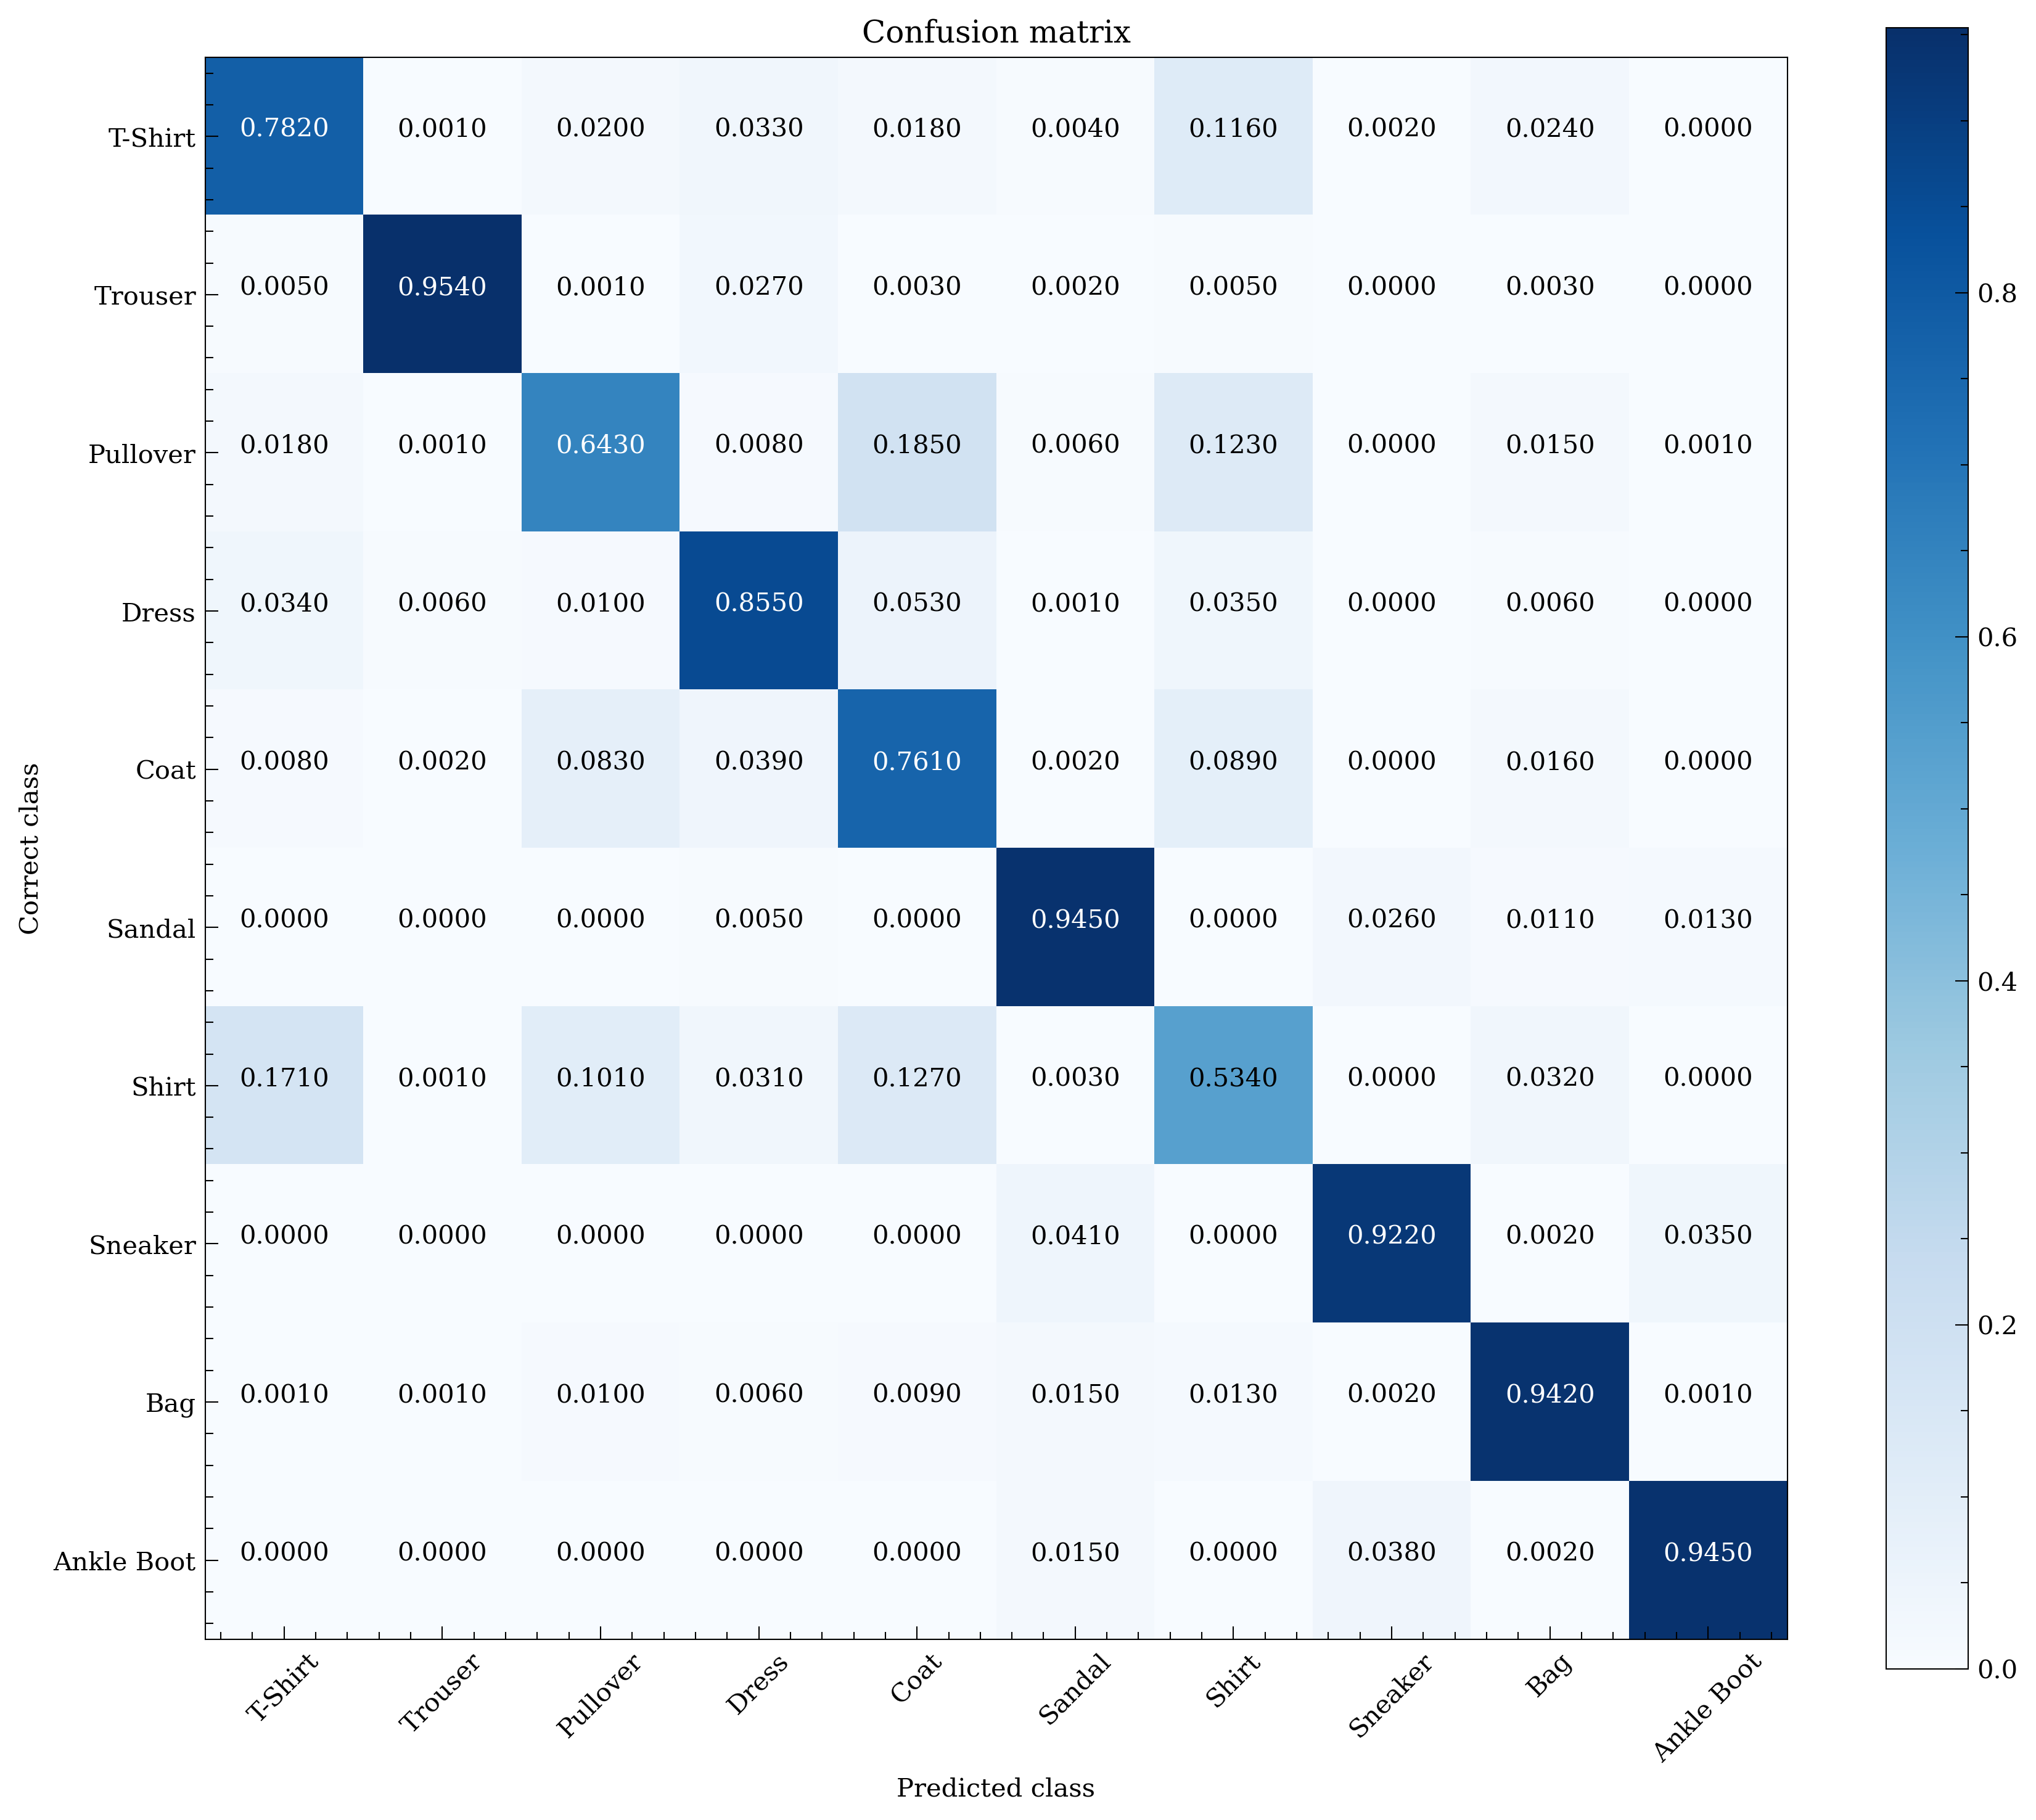

In [33]:
# Get the predictions over the test set
all_preds_test, labels_test = get_all_preds(network=model, dataloader=test_dl)

# Get the confusion matrix
cm = met.confusion_matrix(y_true=labels_test, y_pred=all_preds_test.argmax(1).numpy())

# Plot the predictions as a confusion matrix
plot_confusion_matrix(cm, target_names=labels_map.values(), cmap='Blues', normalize=True)

### References

[1] [A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

[2] [Fashion MNIST classification using custom PyTorch Convolution Neural Network (CNN)](https://boscoj2008.github.io/customCNN/)

[3] [Convolutional Neural Networks](https://www.ibm.com/cloud/learn/convolutional-neural-networks)